In [65]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta

%matplotlib inline

## CLIENT PROFILES DF

In [3]:
# Read Client Profiles dataset
archivo_clients = "/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/client_profiles_df.csv"
client_profiles_df = pd.read_csv(archivo_clients)

In [4]:
# Show first rows of the dataframe
client_profiles_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,unknown,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,unknown,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,unknown,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,male,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,female,2.0,103671.75,0.0,3.0


## Univariate Analysis

### Categorical Variables 

gender column

In [5]:
# Creating a crosstab table for the 'gender' column, counting occurrences for each unique value
gender_table = pd.crosstab(index = client_profiles_df["gender"], columns="count")     
gender_table

col_0,count
gender,
female,22746
male,23724
unknown,24139


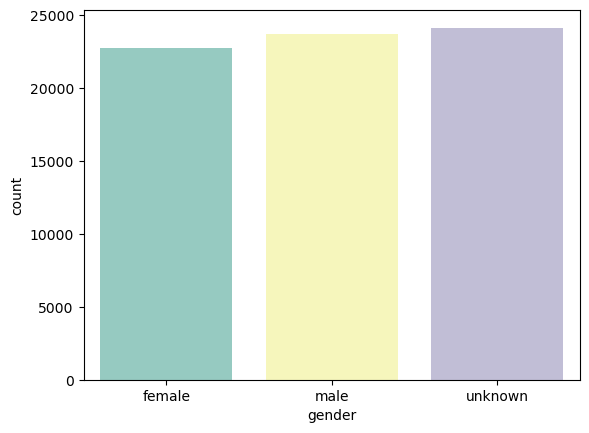

In [6]:
# Create a bar chart with 'gender' column
sns.barplot(x=gender_table.index, y=gender_table["count"], palette="Set3");

<Axes: ylabel='count'>

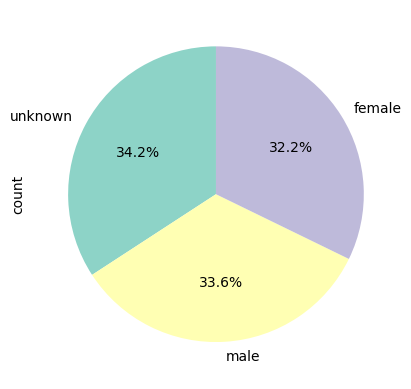

In [7]:
# Create a pie chart with 'gender' column
client_profiles_df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))


### Numerical Variables 

In [8]:
# Show basic descriptive analysis for numerical variables
client_profiles_df.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,12.052950,150.631885,46.442359,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871137,82.104912,15.589619,0.534944,3.014788e+05,2.236358,2.353052
min,1.690000e+02,2.000000,12.052950,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.735012e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.334555e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.376355e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


clnt_age column

In [9]:
# Check statistics of clients age
average_age = client_profiles_df['clnt_age'].mean()
std_dev_age = client_profiles_df['clnt_age'].std()
range_age = client_profiles_df['clnt_age'].max() - client_profiles_df['clnt_age'].min()
min_age = client_profiles_df['clnt_age'].min()
max_age = client_profiles_df['clnt_age'].max()
iqr_age = client_profiles_df['clnt_age'].quantile(0.75) - client_profiles_df['clnt_age'].quantile(0.25)
print(f"The average age of clients is: {average_age}")
print(f"The standard deviation of clients age is: {std_dev_age}")
print(f"The minimun age of clients is: {min_age}")
print(f"The maximum age of clients is: {max_age}")
print(f"The range age of clients is: {range_age}")
print(f"The IQR of clients age is: {iqr_age}")


The average age of clients is: 46.44235862283845
The standard deviation of clients age is: 15.58961851757077
The minimun age of clients is: 13.5
The maximum age of clients is: 96.0
The range age of clients is: 82.5
The IQR of clients age is: 26.5


<Axes: xlabel='clnt_age', ylabel='Count'>

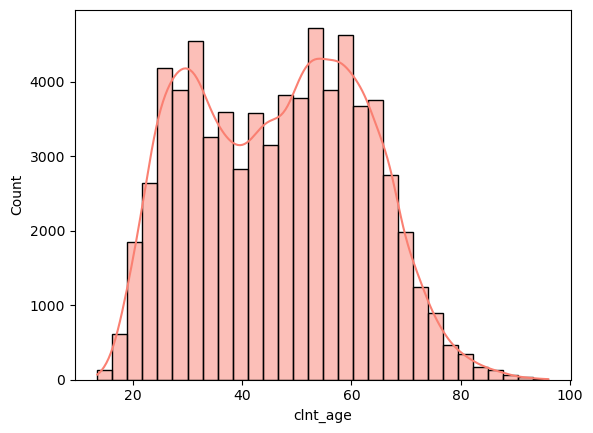

In [10]:
# Create a histoplot for age of clients
sns.histplot(client_profiles_df['clnt_age'], kde=True, bins=30, color="salmon")

<Axes: >

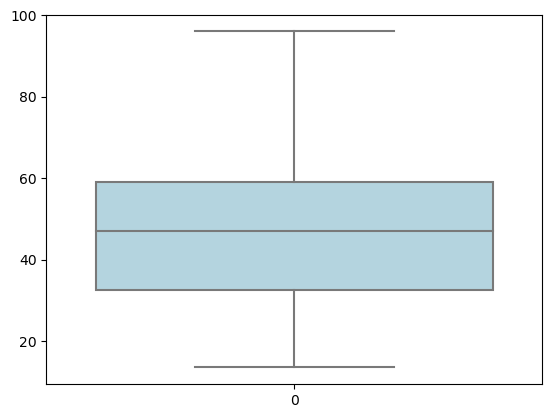

In [11]:
# Create a box plot for age of clients
sns.boxplot(data = client_profiles_df['clnt_age'], color="lightblue")

clnt_tenure_yr column

In [12]:
# Check statistics of years spent in Vanguard
average_years = client_profiles_df['clnt_tenure_yr'].mean()
std_dev_years = client_profiles_df['clnt_tenure_yr'].std()
range_years = client_profiles_df['clnt_tenure_yr'].max() - client_profiles_df['clnt_tenure_yr'].min()
min_years = client_profiles_df['clnt_tenure_yr'].min()
max_years = client_profiles_df['clnt_tenure_yr'].max()
iqr_years = client_profiles_df['clnt_tenure_yr'].quantile(0.75) - client_profiles_df['clnt_tenure_yr'].quantile(0.25)
print(f"The average number of years spent in Vanguard is: {average_years}")
print(f"The standard deviation of number of years spent in Vanguard is: {std_dev_years}")
print(f"The minimun number of years spent in Vanguard is: {min_years}")
print(f"The maximum number of years spent in Vanguard is: {max_years}")
print(f"The range of number of years spent in Vanguard is: {range_years}")
print(f"The IQR of years spent in Vanguard is: {iqr_years}")

The average number of years spent in Vanguard is: 12.052949925632127
The standard deviation of number of years spent in Vanguard is: 6.871137207862344
The minimun number of years spent in Vanguard is: 2.0
The maximum number of years spent in Vanguard is: 62.0
The range of number of years spent in Vanguard is: 60.0
The IQR of years spent in Vanguard is: 10.0


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

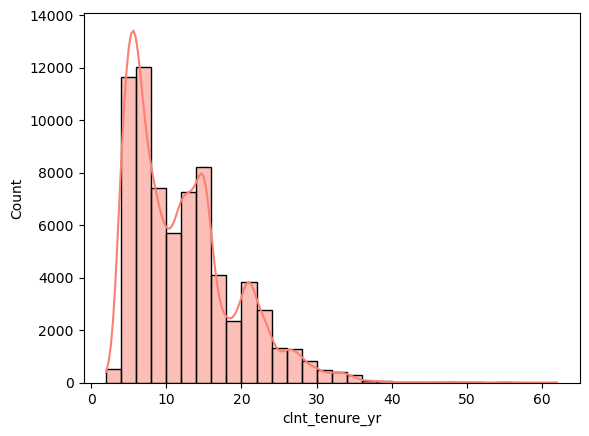

In [13]:
# Create a histoplot for years spent in Vanguard
sns.histplot(client_profiles_df['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

<Axes: >

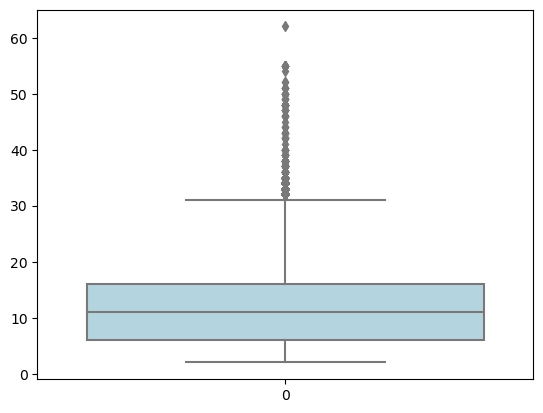

In [14]:
# Create a box plot for years spent in Vanguard
sns.boxplot(data = client_profiles_df['clnt_tenure_yr'], color="lightblue")

In [15]:
top_clients_years = client_profiles_df['clnt_tenure_yr'].sort_values(ascending=False).head(10)
print (f"Clients that have spent more years with Vanguard are: {top_clients_years}")

Clients that have spent more years with Vanguard are: 64690    62.0
63034    55.0
50644    55.0
12871    55.0
22168    55.0
68183    55.0
30335    55.0
11329    55.0
23857    55.0
56608    55.0
Name: clnt_tenure_yr, dtype: float64


clnt_tenure_mnth column

In [16]:
# Check statistics of months spent in Vanguard
average_months = client_profiles_df['clnt_tenure_mnth'].mean()
std_dev_months = client_profiles_df['clnt_tenure_mnth'].std()
range_months = client_profiles_df['clnt_tenure_mnth'].max() - client_profiles_df['clnt_tenure_mnth'].min()
min_months = client_profiles_df['clnt_tenure_mnth'].min()
max_months = client_profiles_df['clnt_tenure_mnth'].max()
iqr_months = client_profiles_df['clnt_tenure_mnth'].quantile(0.75) - client_profiles_df['clnt_tenure_mnth'].quantile(0.25)
print(f"The average number of months spent in Vanguard is: {average_months}")
print(f"The standard deviation of number of months spent in Vanguard is: {std_dev_months}")
print(f"The minimun number of months spent in Vanguard is: {min_months}")
print(f"The maximum number of months spent in Vanguard is: {max_months}")
print(f"The range of number of months spent in Vanguard is: {range_months}")
print(f"The IQR of months spent in Vanguard is: {iqr_months}")

The average number of months spent in Vanguard is: 150.63188462234217
The standard deviation of number of months spent in Vanguard is: 82.10491173382033
The minimun number of months spent in Vanguard is: 12.052949925632127
The maximum number of months spent in Vanguard is: 749.0
The range of number of months spent in Vanguard is: 736.9470500743679
The IQR of months spent in Vanguard is: 110.0


<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

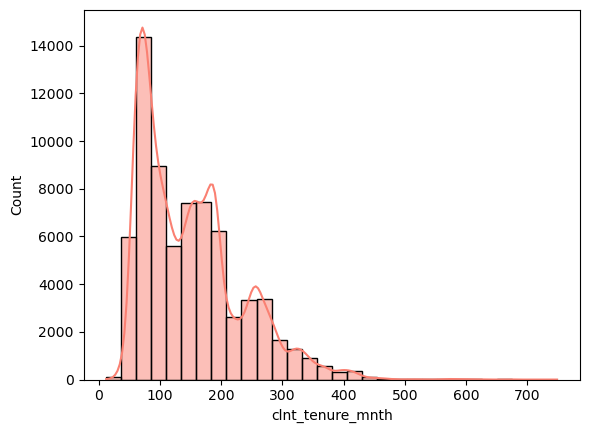

In [17]:
# Create a histoplot for months spent in Vanguard
sns.histplot(client_profiles_df['clnt_tenure_mnth'], kde=True, bins=30, color="salmon")

<Axes: >

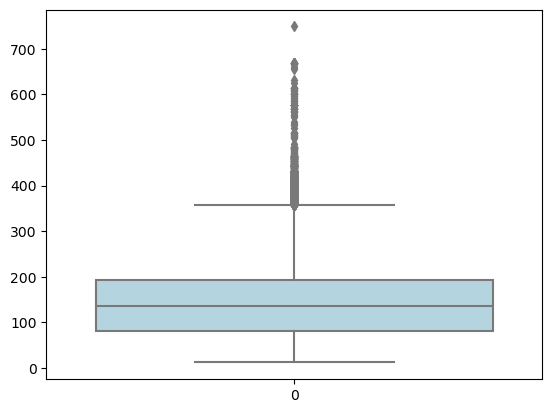

In [18]:
# Create a box plot for months spent in Vanguard
sns.boxplot(data = client_profiles_df['clnt_tenure_mnth'], color="lightblue")

num_accts column

In [19]:
# Check statistics of number of accounts in Vanguard
average_accounts = client_profiles_df['num_accts'].mean()
std_dev_accounts = client_profiles_df['num_accts'].std()
range_accounts = client_profiles_df['num_accts'].max() - client_profiles_df['num_accts'].min()
min_accounts = client_profiles_df['num_accts'].min()
max_accounts = client_profiles_df['num_accts'].max()
iqr_accounts = client_profiles_df['num_accts'].quantile(0.75) - client_profiles_df['num_accts'].quantile(0.25)
print(f"The average number of accounts clients hold with Vanguard is: {average_accounts}")
print(f"The standard deviation of number of accounts clients hold with Vanguard is: {std_dev_accounts}")
print(f"The minimun number of accounts clients hold with Vanguard is: {min_accounts}")
print(f"The maximum number of accounts clients hold with Vanguard is: {max_accounts}")
print(f"The range number of accounts clients hold with Vanguard is: {range_accounts}")
print(f"The IQR of accounts clients hold with Vanguard is: {iqr_accounts}")

The average number of accounts clients hold with Vanguard is: 2.255528011898859
The standard deviation of number of accounts clients hold with Vanguard is: 0.5349438147179678
The minimun number of accounts clients hold with Vanguard is: 1.0
The maximum number of accounts clients hold with Vanguard is: 8.0
The range number of accounts clients hold with Vanguard is: 7.0
The IQR of accounts clients hold with Vanguard is: 0.0


<Axes: xlabel='num_accts', ylabel='Count'>

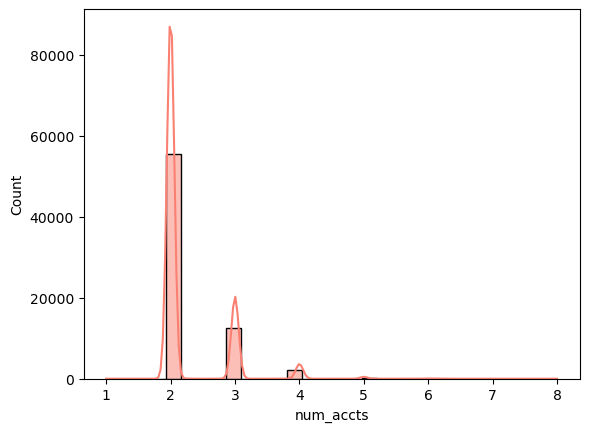

In [20]:
# Create a histoplot for number of accounts in Vanguard
sns.histplot(client_profiles_df['num_accts'], kde=True, bins=30, color="salmon")

bal column

In [21]:
# Check statistics of total balance spread across all accounts for a particular client (bal)
average_bal = client_profiles_df['bal'].mean()
std_dev_bal = client_profiles_df['bal'].std()
range_bal = client_profiles_df['bal'].max() - client_profiles_df['bal'].min()
min_bal = client_profiles_df['bal'].min()
max_bal = client_profiles_df['bal'].max()
iqr_bal = client_profiles_df['bal'].quantile(0.75) - client_profiles_df['bal'].quantile(0.25)
print(f"The average number of total balance spread across all accounts for a particular client is: {average_bal}")
print(f"The standard deviation of total balance spread across all accounts for a particular client is: {std_dev_bal}")
print(f"The minimun number of total balance spread across all accounts for a particular client is: {min_bal}")
print(f"The maximum number of total balance spread across all accounts for a particular client is: {max_bal}")
print(f"The range number of total balance spread across all accounts for a particular client is: {range_bal}")
print(f"The IQR of total balance spread across all accounts for a particular client is: {iqr_bal}")

The average number of total balance spread across all accounts for a particular client is: 147445.2406414052
The standard deviation of total balance spread across all accounts for a particular client is: 301478.8138052144
The minimun number of total balance spread across all accounts for a particular client is: 13789.419999999998
The maximum number of total balance spread across all accounts for a particular client is: 16320040.15
The range number of total balance spread across all accounts for a particular client is: 16306250.73
The IQR of total balance spread across all accounts for a particular client is: 100285.40000000002


calls_6_mnth column

In [22]:
# Check statistics of the number of times the client reached out over a call in the past six months (calls-6_mnth)
average_calls = client_profiles_df['calls_6_mnth'].mean()
std_dev_calls = client_profiles_df['calls_6_mnth'].std()
range_calls = client_profiles_df['calls_6_mnth'].max() - client_profiles_df['calls_6_mnth'].min()
min_calls = client_profiles_df['calls_6_mnth'].min()
max_calls = client_profiles_df['calls_6_mnth'].max()
iqr_calls = client_profiles_df['calls_6_mnth'].quantile(0.75) - client_profiles_df['calls_6_mnth'].quantile(0.25)
print(f"The average number of the number of times the client reached out over a call in the past six months is: {average_calls}")
print(f"The standard deviation of the number of times the client reached out over a call in the past six months is: {std_dev_calls}")
print(f"The minimun number of the number of times the client reached out over a call in the past six months is: {min_calls}")
print(f"The maximum number of the number of times the client reached out over a call in the past six months is: {max_calls}")
print(f"The range number of the number of times the client reached out over a call in the past six months is: {range_calls}")
print(f"The IQR of the number of times the client reached out over a call in the past six months is: {iqr_calls}")

The average number of the number of times the client reached out over a call in the past six months is: 3.3824775125717115
The standard deviation of the number of times the client reached out over a call in the past six months is: 2.2363584393542517
The minimun number of the number of times the client reached out over a call in the past six months is: 0.0
The maximum number of the number of times the client reached out over a call in the past six months is: 7.0
The range number of the number of times the client reached out over a call in the past six months is: 7.0
The IQR of the number of times the client reached out over a call in the past six months is: 5.0


logons_6_mnth column

In [23]:
# Check statistics of the frequency with which the client logged onto Vanguard’s platform over the last six months (logons_6_mnth)
average_logons = client_profiles_df['logons_6_mnth'].mean()
std_dev_logons = client_profiles_df['logons_6_mnth'].std()
range_logons = client_profiles_df['logons_6_mnth'].max() - client_profiles_df['logons_6_mnth'].min()
min_logons = client_profiles_df['logons_6_mnth'].min()
max_logons = client_profiles_df['logons_6_mnth'].max()
iqr_logons = client_profiles_df['logons_6_mnth'].quantile(0.75) - client_profiles_df['logons_6_mnth'].quantile(0.25)
print(f"The average number of the frequency with which the client logged onto Vanguards platform over the last six months is: {average_logons}")
print(f"The standard deviation of the frequency with which the client logged onto Vanguards platform over the last six months is: {std_dev_logons}")
print(f"The minimun number of the frequency with which the client logged onto Vanguards platform over the last six months is: {min_logons}")
print(f"The maximum number of the frequency with which the client logged onto Vanguards platform over the last six months is: {max_logons}")
print(f"The range number of the frequency with which the client logged onto Vanguards platform over the last six months is: {range_logons}")
print(f"The IQR of the frequency with which the client logged onto Vanguards platform over the last six months is: {iqr_logons}")

The average number of the frequency with which the client logged onto Vanguards platform over the last six months is: 5.566739854097316
The standard deviation of the frequency with which the client logged onto Vanguards platform over the last six months is: 2.3530524155712915
The minimun number of the frequency with which the client logged onto Vanguards platform over the last six months is: 1.0
The maximum number of the frequency with which the client logged onto Vanguards platform over the last six months is: 9.0
The range number of the frequency with which the client logged onto Vanguards platform over the last six months is: 8.0
The IQR of the frequency with which the client logged onto Vanguards platform over the last six months is: 3.0


## DIGITAL FOOTPRINTS DF

In [24]:
# Read Digital Footprints dataset
archivo_digital = "/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/digital_footprints_df.csv"
digital_footprints_df = pd.read_csv(archivo_digital)

In [25]:
# Show first rows of the dataframe
digital_footprints_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


## EXPERIMENT ROSTER DF

In [26]:
# Read Experiment Roster dataset
archivo_experiment = "/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/experiment_roster_df.csv"
experiment_roster_df = pd.read_csv(archivo_experiment)

In [27]:
# Show first rows of the dataframe
experiment_roster_df.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [28]:
# Count number of clients for each variation
variation_counts = experiment_roster_df['Variation'].value_counts()

# Calculate the percentage of clients for each variation 
percentage_test = (variation_counts['Test'] / len(experiment_roster_df)) * 100
percentage_control = (variation_counts['Control'] / len(experiment_roster_df)) * 100

# Show the results
print(f"Percentage of clients for Test variation: {percentage_test:.2f}%")
print(f"Percentage of clients for Test variation: {percentage_control:.2f}%")


Percentage of clients for Test variation: 38.19%
Percentage of clients for Test variation: 33.33%


# Bivariate Analysis

### Number of clients by variation and gender

In [29]:
# Fusionar los datasets en función de client_id
clients_experiment_df = pd.merge(client_profiles_df, experiment_roster_df, on='client_id')

# Realizar el groupby por variación y género y contar el número de clientes
grouped_clients_gender_df = clients_experiment_df.groupby(['Variation', 'gender']).size().reset_index(name='Count')

# Mostrar el resultado
grouped_clients_gender_df.head(6)


,Variation,gender,Count
0,Control,female,7543
1,Control,male,7970
2,Control,unknown,8019
3,Test,female,8716
4,Test,male,8977
5,Test,unknown,9275


<Axes: xlabel='gender', ylabel='Count'>

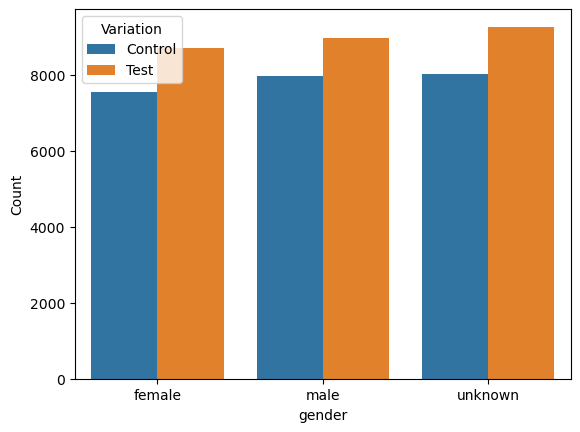

In [30]:
# Create a bar chart with clients on both groups by gender
sns.barplot(data=grouped_clients_gender_df, x='gender', y='Count', hue='Variation')

In [31]:
# Calcular los totales de clientes para cada variación
grouped_clients_gender_df['Total'] = grouped_clients_gender_df.groupby('Variation')['Count'].transform('sum')

# Calcular los porcentajes
grouped_clients_gender_df['Percentage'] = (grouped_clients_gender_df['Count'] / grouped_clients_gender_df['Total']) * 100

# Mostrar el DataFrame con los porcentajes
grouped_clients_gender_df.head(6)


,Variation,gender,Count,Total,Percentage
0,Control,female,7543,23532,32.054224
1,Control,male,7970,23532,33.868774
2,Control,unknown,8019,23532,34.077002
3,Test,female,8716,26968,32.319786
4,Test,male,8977,26968,33.287600
5,Test,unknown,9275,26968,34.392613


### SEPARATE CLIENTS BY TEST GROUP AND CONTROL GROUP

#### Test Clients

In [32]:
# Create a dataframe for clients that belong to Test Variation
client_id_test = experiment_roster_df.loc[experiment_roster_df['Variation']== 'Test', 'client_id'].unique()
df_client_id_test = pd.DataFrame({'client_id': client_id_test})
df_client_id_test

,client_id
0,9988021
1,8320017
2,1982004
3,9466803
4,3170143
...,...
26963,5969816
26964,8692087
26965,7230446
26966,5230357


#### Control Clients

In [33]:
# Create a dataframe for clients that belong to Control Variation
client_id_control = experiment_roster_df.loc[experiment_roster_df['Variation']== 'Control', 'client_id'].unique()
df_client_id_control = pd.DataFrame({'client_id': client_id_control})
df_client_id_control

,client_id
0,4033851
1,9294070
2,6651403
3,2105948
4,9814849
...,...
23527,4364429
23528,8730282
23529,5305116
23530,393005


### Join Test clients to their digital footprint

In [34]:
# Join clients that belong to Test Variation to their digital footprints
df_client_test_digital = pd.merge(df_client_id_test, digital_footprints_df, on='client_id', how='inner')
df_client_test_digital

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
177842,6334360,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
177843,6334360,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
177844,6334360,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
177845,6334360,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


### Join Control Variation to their digital footprint

In [35]:
# Join clients that belong to Control Variation to their digital footprints
df_client_control_digital = pd.merge(df_client_id_control, digital_footprints_df, on='client_id', how='inner')
df_client_control_digital

,client_id,visitor_id,visit_id,process_step,date_time
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...
143457,393005,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29 15:25:20
143458,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
143459,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
143460,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


### CREATE GRAPHICS FOR TEST VARIATION CLIENTS

#### Bar chart for number of Test clients for each process step

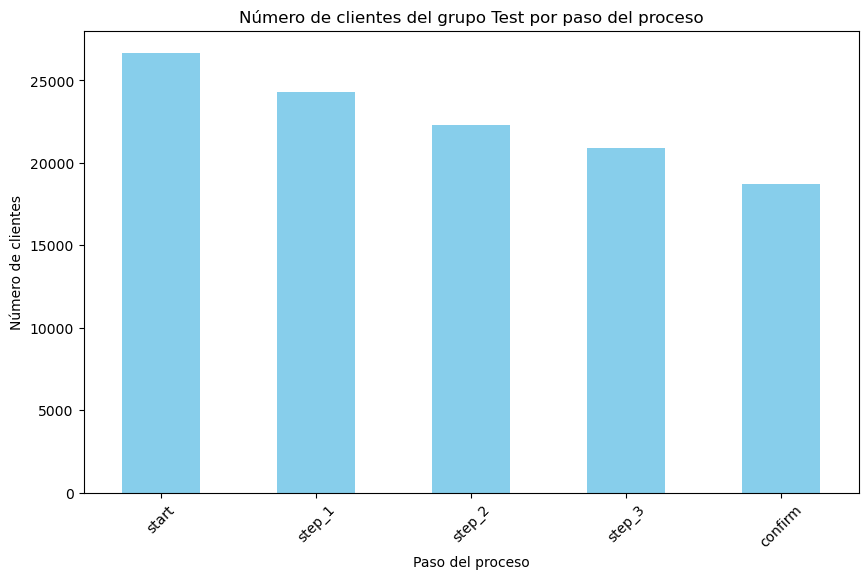

In [36]:
# Number of clients of Test Variation for each process step 
# Contar la cantidad de clientes únicos que han realizado cada paso del proceso
process_step_counts_test = df_client_test_digital.groupby('process_step')['client_id'].nunique()

# Ordenar los pasos del proceso para asegurar el orden en el gráfico
process_step_counts_test  = process_step_counts_test.reindex(['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
process_step_counts_test.plot(kind='bar', color='skyblue')
plt.title('Número de clientes del grupo Test por paso del proceso')
plt.xlabel('Paso del proceso')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

### CREATE GRAPHICS FOR CONTROL VARIATION CLIENTS

#### Bar chart for number of Control clients for each process step 

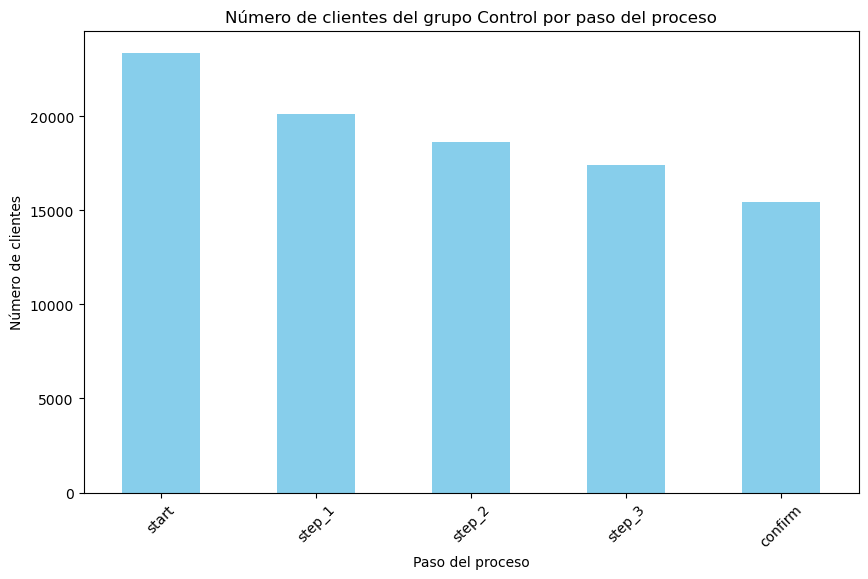

In [37]:
# Number of clients of Control Variation for each process step
# Contar la cantidad de clientes únicos que han realizado cada paso del proceso
process_step_counts_control = df_client_control_digital.groupby('process_step')['client_id'].nunique()

# Ordenar los pasos del proceso para asegurar el orden en el gráfico
process_step_counts_control = process_step_counts_control.reindex(['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
process_step_counts_control.plot(kind='bar', color='skyblue')
plt.title('Número de clientes del grupo Control por paso del proceso')
plt.xlabel('Paso del proceso')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

#### Test Clients attributes

In [68]:
# Fusionar las tablas en función del client_id para agregar la información del grupo Test
df_client_test = pd.merge(df_client_id_test, client_profiles_df[['client_id', 'clnt_age', 'clnt_tenure_yr', 'gender', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']], on='client_id', how='left')
df_client_test.head()

,client_id,clnt_age,clnt_tenure_yr,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,79.0,5.0,unknown,2.0,189023.86,1.0,4.0
1,8320017,34.5,22.0,male,2.0,36001.90,5.0,8.0
2,1982004,44.5,6.0,unknown,2.0,30231.76,1.0,4.0
3,9466803,27.0,11.0,female,2.0,46131.19,1.0,4.0
4,3170143,53.5,21.0,female,2.0,192109.59,6.0,9.0


In [39]:
# Average age of Test clients
df_client_test["clnt_age"].mean()

47.1638794126372

In [40]:
df_client_test.shape

(26968, 6)

<Axes: xlabel='clnt_age', ylabel='Count'>

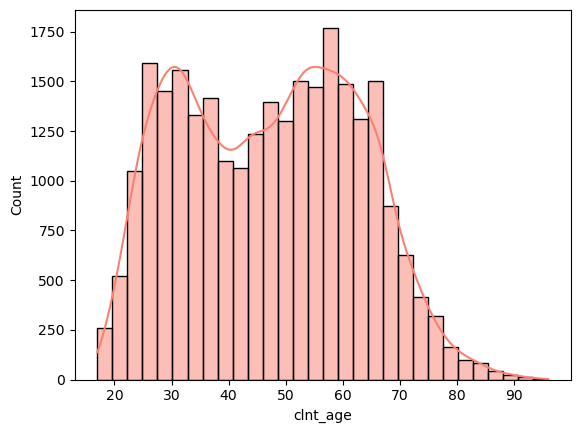

In [41]:
# Create a histoplot for age of clients
sns.histplot(df_client_test['clnt_age'], kde=True, bins=30, color="salmon")

#### Control Clients attributes

In [69]:
# Fusionar las tablas en función del client_id para agregar la información del grupo Control
df_client_control = pd.merge(df_client_id_control, client_profiles_df[['client_id', 'clnt_age', 'clnt_tenure_yr', 'gender', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']], on='client_id', how='left')
df_client_control.head()

,client_id,clnt_age,clnt_tenure_yr,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,63.5,12.0,male,2.0,142642.26,5.0,8.0
1,9294070,29.0,5.0,unknown,2.0,34254.54,0.0,3.0
2,6651403,56.5,13.0,male,2.0,324712.88,4.0,7.0
3,2105948,61.5,6.0,unknown,2.0,39795.28,1.0,4.0
4,9814849,32.5,12.0,female,2.0,33807.15,1.0,4.0


In [43]:
df_client_control.shape

(23532, 6)

In [44]:
# Average age of Control clients
df_client_control["clnt_age"].mean()

47.498300186979435

#### Relationship between number of accounts and balance on Test clients

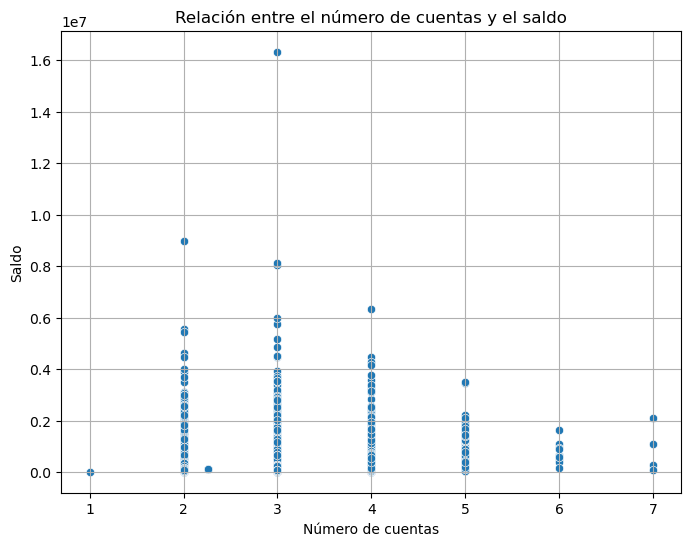

Coeficiente de correlación: 0.2567857876182945


In [45]:
# Trazar el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_client_test, x="num_accts", y="bal")
plt.title("Relación entre el número de cuentas y el saldo")
plt.xlabel("Número de cuentas")
plt.ylabel("Saldo")
plt.grid(True)
plt.show()

# Calcular el coeficiente de correlación
correlation = df_client_test["num_accts"].corr(df_client_test["bal"])
print("Coeficiente de correlación:", correlation)

#### Relationship between number of accounts and balance on Test clients

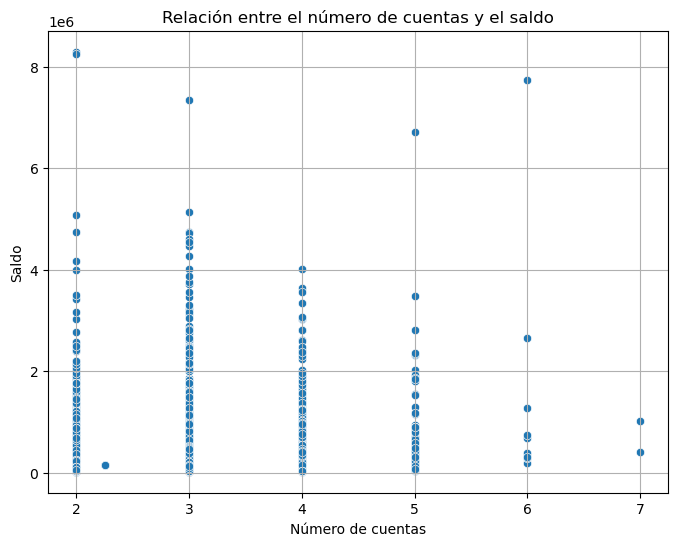

Coeficiente de correlación: 0.2768093185745736


In [46]:
# Trazar el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_client_control, x="num_accts", y="bal")
plt.title("Relación entre el número de cuentas y el saldo")
plt.xlabel("Número de cuentas")
plt.ylabel("Saldo")
plt.grid(True)
plt.show()

# Calcular el coeficiente de correlación
correlation = df_client_control["num_accts"].corr(df_client_control["bal"])
print("Coeficiente de correlación:", correlation)

#### Balance vs Gender on Test Clients

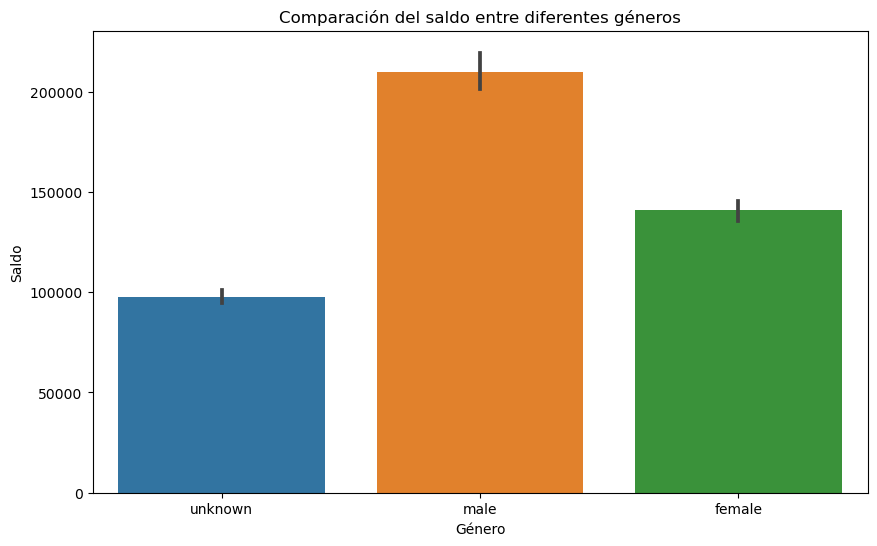

In [47]:
# Comparación del saldo entre diferentes géneros
plt.figure(figsize=(10, 6))
sns.barplot(data=df_client_test, x="gender", y="bal")
plt.title("Comparación del saldo entre diferentes géneros")
plt.xlabel("Género")
plt.ylabel("Saldo")
plt.show()


#### Balance vs Gender on Control Clients

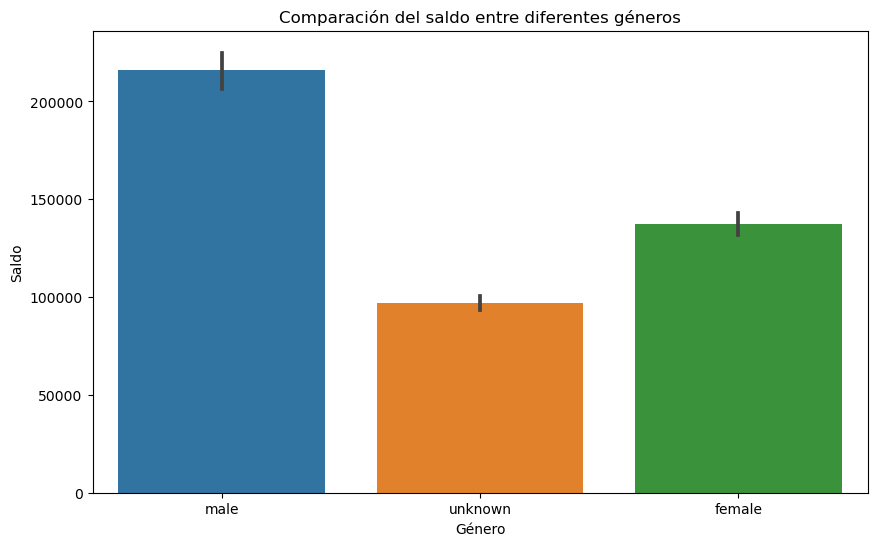

In [48]:
# Comparación del saldo entre diferentes géneros
plt.figure(figsize=(10, 6))
sns.barplot(data=df_client_control, x="gender", y="bal")
plt.title("Comparación del saldo entre diferentes géneros")
plt.xlabel("Género")
plt.ylabel("Saldo")
plt.show()

# KPIs and Metrics

## Completion Rate: 

### Proportion of clients who reach the final ‘confirm’ step 

In [49]:
# Calculate number of unique clients that reached the confirm step 
num_clients_confirm = digital_footprints_df[digital_footprints_df['process_step'] == 'confirm']['client_id'].nunique()
num_clients_confirm

81145

In [50]:
# Percentage of unique clients that reached the confirm step 
percentage_confirm = (num_clients_confirm / digital_footprints_df['client_id'].nunique()) * 100
print("The proportion of clients who reach the final 'confirm' step is: {:.2f}%".format(percentage_confirm))

The proportion of clients who reach the final 'confirm' step is: 67.53%


### Proportion of Test clients who reach the final ‘confirm’ step 

In [51]:
# Calculate number of Control clients that reached the confirm step 
num_test_clients_confirm = len(df_client_test_digital[df_client_test_digital["process_step"]=="confirm"])
total_test_clients = len(df_client_test_digital)
# Calculate completion rate for Control Clients
completion_rate_test = num_test_clients_confirm / total_test_clients
completion_rate_test




0.1446299347191687

### Proportion of Control clients who reach the final ‘confirm’ step 

In [52]:
# Calculate number of Control clients that reached the confirm step 
num_control_clients_confirm = len(df_client_control_digital[df_client_control_digital["process_step"]=="confirm"])
total_control_clients = len(df_client_control_digital)
# Calculate completion rate for Control Clients
completion_rate_control = num_control_clients_confirm / total_control_clients
completion_rate_control

0.12201837420362187

#### Clients in the Test group are the ones who have reached the final 'confirm' step most often.

### Bar chart number of clients that reached the confirm step

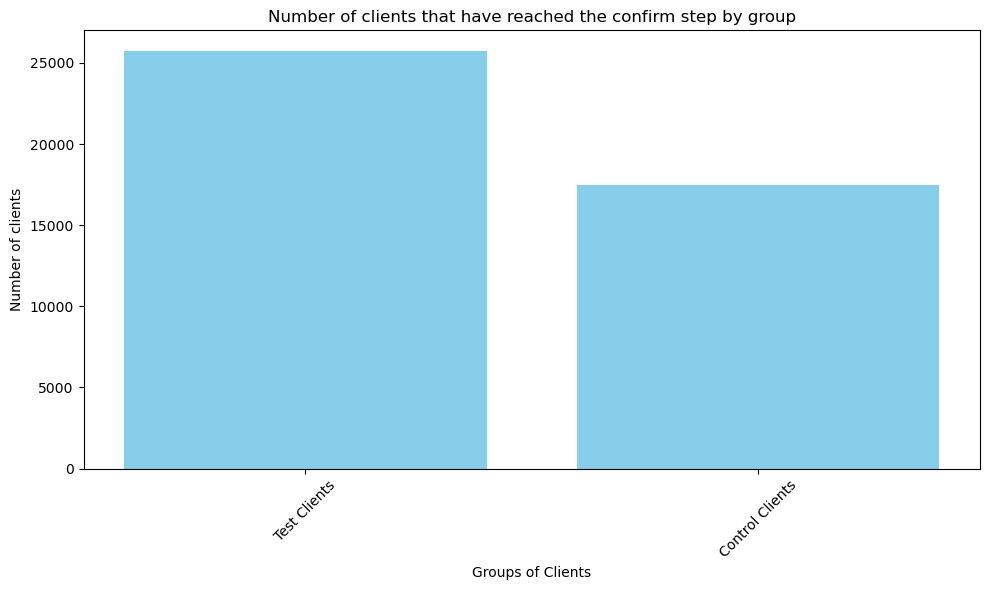

In [53]:
groups_of_clients = ['Test Clients', 'Control Clients']
number_of_confirms = [num_test_clients_confirm, num_control_clients_confirm]


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Graficar los datos
plt.bar(groups_of_clients, number_of_confirms, color='skyblue')

# Agregar título y etiquetas
plt.title('Number of clients that have reached the confirm step by group')
plt.xlabel('Groups of Clients')
plt.ylabel('Number of clients')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

## Time Spent on Each Step

### Time Spent on Each Step for Test Clients

In [54]:
# Convertir la columna 'date_time' a formato de fecha y hora
df_client_test_digital['date_time'] = pd.to_datetime(df_client_test_digital['date_time'])

# Ordenar correctamente el DataFrame
df_client_test_digital.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Calcular el tiempo pasado entre process_step consecutivos
df_client_test_digital['time_spent'] = df_client_test_digital.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Extraer días y tiempo separadamente
df_client_test_digital['date_spent'] = df_client_test_digital['time_spent'].dt.days.fillna(0).astype(int)
df_client_test_digital['time_spent'] = df_client_test_digital['time_spent'].apply(lambda x: pd.Timedelta(seconds=x.total_seconds() % 86400) if pd.notnull(x) else pd.Timedelta(seconds=0))

# Ajustar días negativos a cero
df_client_test_digital['date_spent'] = df_client_test_digital['date_spent'].apply(lambda x: max(x, 0))

# Asignar la columna 'time_spent' definitivamente al DataFrame
df_client_test_digital['time_spent'] = df_client_test_digital['time_spent']

# Convertir la columna 'time_spent' a formato timedelta
df_client_test_digital['time_spent'] = pd.to_timedelta(df_client_test_digital['time_spent'])

# Convertir los intervalos de tiempo a segundos
df_client_test_digital['time_spent_seconds'] = df_client_test_digital['time_spent'].apply(lambda x: x.total_seconds())
df_client_test_digital


,client_id,visitor_id,visit_id,process_step,date_time,time_spent,date_spent,time_spent_seconds
52161,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0 days 00:00:00,0,0.0
52160,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,0 days 00:00:07,0,7.0
52159,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,0 days 00:00:32,0,32.0
52158,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,0 days 00:01:39,0,99.0
52157,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,0 days 00:00:20,0,20.0
...,...,...,...,...,...,...,...,...
77449,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,0 days 00:00:21,0,21.0
77444,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,0 days 00:00:00,0,0.0
77443,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,0 days 00:00:15,0,15.0
8318,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,0 days 00:00:00,0,0.0


In [55]:
# Calculate the average time spent on each step for the Test group
average_time_test= df_client_test_digital.groupby('process_step')['time_spent'].mean()

# Print the results
print("Average Time Spent on Each Step (Test Group):")
print(average_time_test)


Average Time Spent on Each Step (Test Group):
process_step
confirm   0 days 00:01:51.798615970
start     0 days 00:01:01.011881573
step_1    0 days 00:00:37.395093891
step_2    0 days 00:00:47.866016973
step_3    0 days 00:01:35.848574959
Name: time_spent, dtype: timedelta64[ns]


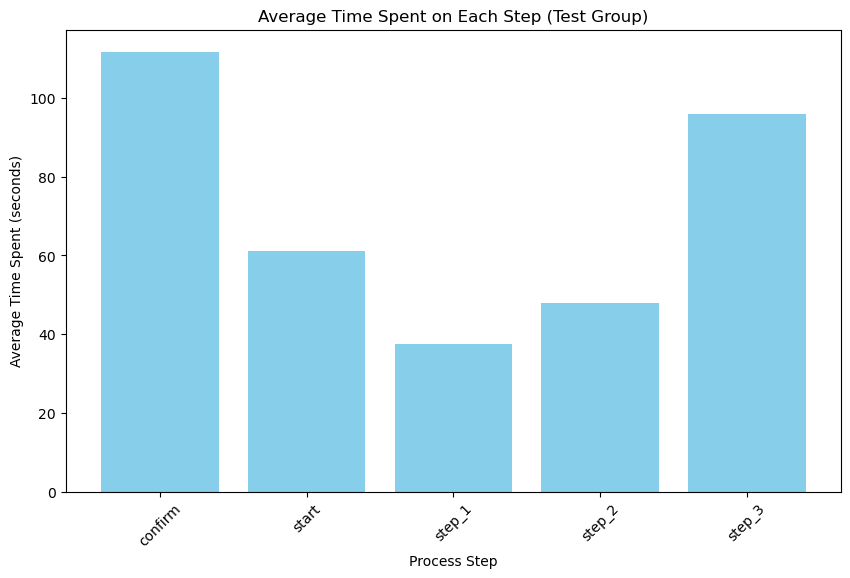

In [56]:
# Datos de tiempo invertido de los Test Clients
test_time_spent = {
    'process_step': ['confirm', 'start', 'step_1', 'step_2', 'step_3'],
    'average_time_spent': [
        pd.Timedelta('0 days 00:01:51.798615970'),
        pd.Timedelta('0 days 00:01:01.011881573'),
        pd.Timedelta('0 days 00:00:37.395093891'),
        pd.Timedelta('0 days 00:00:47.866016973'),
        pd.Timedelta('0 days 00:01:35.848574959')
    ]
}

# Crear un DataFrame
test_time_spent_df = pd.DataFrame(test_time_spent)

# Convertir el tiempo a segundos
test_time_spent_df['average_time_spent_seconds'] = test_time_spent_df['average_time_spent'].dt.total_seconds()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(test_time_spent_df['process_step'], test_time_spent_df['average_time_spent_seconds'], color='skyblue')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Step (Test Group)')
plt.xticks(rotation=45)
plt.show()


### Time Spent on Each Step for Control Clients

In [57]:
# Convertir la columna 'date_time' a formato de fecha y hora
df_client_control_digital['date_time'] = pd.to_datetime(df_client_control_digital['date_time'])

# Ordenar correctamente el DataFrame
df_client_control_digital.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Calcular el tiempo pasado entre process_step consecutivos
df_client_control_digital['time_spent'] = df_client_control_digital.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Extraer días y tiempo separadamente
df_client_control_digital['date_spent'] = df_client_control_digital['time_spent'].dt.days.fillna(0).astype(int)
df_client_control_digital['time_spent'] = df_client_control_digital['time_spent'].apply(lambda x: pd.Timedelta(seconds=x.total_seconds() % 86400) if pd.notnull(x) else pd.Timedelta(seconds=0))

# Ajustar días negativos a cero
df_client_control_digital['date_spent'] = df_client_control_digital['date_spent'].apply(lambda x: max(x, 0))

# Asignar la columna 'time_spent' definitivamente al DataFrame
df_client_control_digital['time_spent'] = df_client_control_digital['time_spent']

# Convertir la columna 'time_spent' a formato timedelta
df_client_control_digital['time_spent'] = pd.to_timedelta(df_client_control_digital['time_spent'])

# Convertir los intervalos de tiempo a segundos
df_client_control_digital['time_spent_seconds'] = df_client_control_digital['time_spent'].apply(lambda x: x.total_seconds())
df_client_control_digital

df_client_control_digital


,client_id,visitor_id,visit_id,process_step,date_time,time_spent,date_spent,time_spent_seconds
77582,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,0 days 00:00:00,0,0.0
77581,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,0 days 00:00:49,0,49.0
77580,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,0 days 00:01:03,0,63.0
77579,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,0 days 00:00:09,0,9.0
77578,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,0 days 00:04:35,0,275.0
...,...,...,...,...,...,...,...,...
69747,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,0 days 00:00:14,0,14.0
69744,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,0 days 00:07:03,0,423.0
69745,9998346,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,0 days 00:00:00,0,0.0
69746,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,0 days 00:00:00,0,0.0


In [58]:
# Calculate the average time spent on each step for the Control group
average_time_control= df_client_control_digital.groupby('process_step')['time_spent'].mean()

# Print the results
print("Average Time Spent on Each Step (Control Group):")
print(average_time_control)

Average Time Spent on Each Step (Control Group):
process_step
confirm   0 days 00:02:03.049185946
start     0 days 00:00:53.099563098
step_1    0 days 00:00:42.585681542
step_2    0 days 00:00:38.497566252
step_3    0 days 00:01:32.238868172
Name: time_spent, dtype: timedelta64[ns]


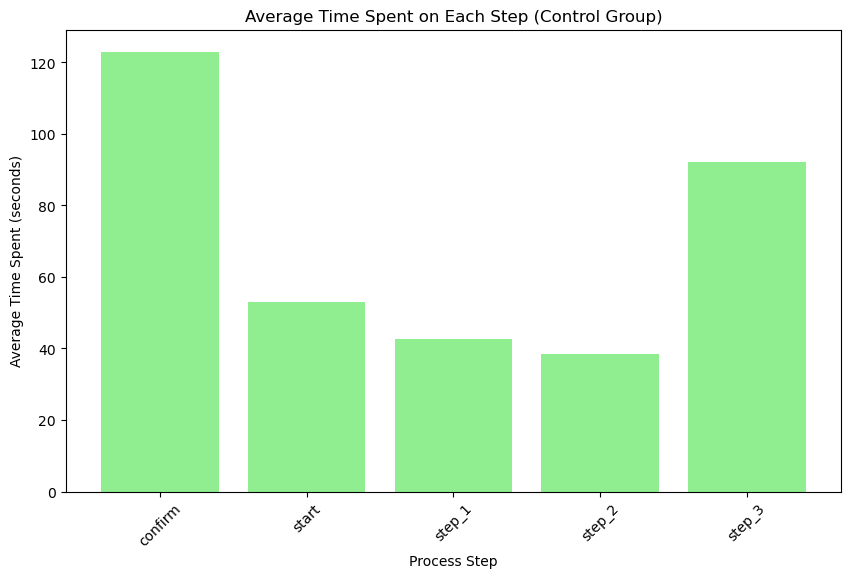

In [59]:
# Datos de tiempo invertido de los Control Clients
control_time_spent = {
    'process_step': ['confirm', 'start', 'step_1', 'step_2', 'step_3'],
    'average_time_spent': [
        pd.Timedelta('0 days 00:02:03.049185946'),
        pd.Timedelta('0 days 00:00:53.099563098'),
        pd.Timedelta('0 days 00:00:42.585681542'),
        pd.Timedelta('0 days 00:00:38.497566252'),
        pd.Timedelta('0 days 00:01:32.238868172')
    ]
}

# Crear un DataFrame
control_time_spent_df = pd.DataFrame(control_time_spent)

# Convertir el tiempo a segundos
control_time_spent_df['average_time_spent_seconds'] = control_time_spent_df['average_time_spent'].dt.total_seconds()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(control_time_spent_df['process_step'], control_time_spent_df['average_time_spent_seconds'], color='lightgreen')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Step (Control Group)')
plt.xticks(rotation=45)
plt.show()


#### El grupo que más tiempo pasa en el paso 'confirm' son los del Control Group 

## Error Rates KPI

### Calculate the error rate for Test Clients

In [60]:
# Definir el mapeo de pasos
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Función para calcular el error rate general
def calculate_error_rate(df):
    df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
    df['step_numeric'] = df['process_step'].map(step_mapping)
    df['previous_step_numeric'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['step_numeric'].shift(1)
    df['backstep'] = df['step_numeric'] < df['previous_step_numeric']
    
    backsteps_count = df['backstep'].sum()
    total_steps = len(df)
    error_rate = backsteps_count / total_steps * 100 if total_steps > 0 else 0
    
    return error_rate

# Calcular el error rate general
error_rate_general = calculate_error_rate(df_client_test_digital)

# Imprimir el resultado
print(f"Error Rate: {error_rate_general:.2f}%")



Error Rate: 9.14%


### Calculate the error rate for Control Clients

In [89]:
# Definir el mapeo de pasos
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Función para calcular el error rate general
def calculate_error_rate(df):
    df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
    df['step_numeric'] = df['process_step'].map(step_mapping)
    df['previous_step_numeric'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['step_numeric'].shift(1)
    df['backstep'] = df['step_numeric'] < df['previous_step_numeric']
    
    backsteps_count = df['backstep'].sum()
    total_steps = len(df)
    error_rate = backsteps_count / total_steps * 100 if total_steps > 0 else 0
    
    return error_rate

# Calcular el error rate general
error_rate_general = calculate_error_rate(df_client_test_digital)

# Imprimir el resultado
print(f"Error Rate: {error_rate_general:.2f}%")

Error Rate: 6.70%


# Hypothesis Testing

### Completion Rate - Hypothesis Testing

In [135]:
# Number of completions and total users in Test group
test_completions = num_test_clients_confirm 
total_test_users = total_test_clients

# Number of completions and total users in Control group
control_completions = num_control_clients_confirm
total_control_users = total_control_clients

# Perform the two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([test_completions, control_completions], [total_test_users, total_control_users], alternative='two-sided')

# Interpret the results
alpha = 0.05  # Significance level
print("Z Score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test and Control groups are different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the completion rates for the Test and Control groups are different.")



Z Score: 18.67324116863663
P-value: 8.173840595991908e-78
Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test and Control groups are different.


#### Completion Rate with a Cost-Effectiveness Threshold

In [136]:
# Calculate the completion rate for the Control group increased by 5%
control_completion_rate_with_threshold = completion_rate_control + 0.05

# Perform the one-sided two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([num_test_clients_confirm, num_control_clients_confirm], [total_test_clients, total_control_clients], alternative='larger')

# Interpret the results
alpha = 0.05  # Significance level
print("Z Score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the completion rate for the Test group is greater than the completion rate for the Control group increased by 5%.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the completion rate for the Test group is greater than the completion rate for the Control group increased by 5%.")


Z Score: 18.67324116863663
P-value: 4.086920297995954e-78
Reject the null hypothesis. There is evidence to suggest that the completion rate for the Test group is greater than the completion rate for the Control group increased by 5%.


#### Average age of clients engaging with the new process

In [86]:
# Extract age data for clients in the Test and Control groups
age_test = df_client_test['clnt_age']
age_control = df_client_control['clnt_age']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(age_test, age_control)

# Interpret the results
alpha = 0.05  # Significance level
print("T Statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the average age of clients engaging with the new process is different from the average age of clients engaging with the old process.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the average age of clients engaging with the new process is different from the average age of clients engaging with the old process.")


T Statistic: -2.4161564504725126
P-value: 0.015688843904893668
Reject the null hypothesis. There is evidence to suggest that the average age of clients engaging with the new process is different from the average age of clients engaging with the old process.


#### Average client tenure of clients engaging with the new process

In [87]:
# Extract tenure data for clients in the Test and Control groups
tenure_test = df_client_test['clnt_tenure_yr']  # Replace 'tenure_column' with the actual column name containing tenure information
tenure_control = df_client_control['clnt_tenure_yr']  # Replace 'tenure_column' with the actual column name containing tenure information

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(tenure_test, tenure_control)

# Interpret the results
alpha = 0.05  # Significance level
print("T Statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the average client tenure of those engaging with the new process is different from the average client tenure of those engaging with the old process.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the average client tenure of those engaging with the new process is different from the average client tenure of those engaging with the old process.")


T Statistic: -1.7120651791114125
P-value: 0.08689079727404246
Fail to reject the null hypothesis. There is no significant evidence to suggest that the average client tenure of those engaging with the new process is different from the average client tenure of those engaging with the old process.


In [67]:
# Extraer las antigüedades de los clientes de ambos grupos
test_tenure = df_client_test['clnt_tenure_yr']
control_tenure = df_client_control['clnt_tenure_yr']

# Realizar la prueba t
t_stat, p_value = ttest_ind(test_tenure, control_tenure)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.7120651791114125
P-value: 0.08689079727404246


#### Gender differences between clients from both groups

In [140]:
# Create a contingency table for gender frequencies in the test and control groups
contingency_table = pd.crosstab(df_client_test['gender'], df_client_control['gender'])

# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the gender proportion of clients engaging in the new process is different from the gender proportion of clients engaging in the old process.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the gender proportion of clients engaging in the new process is different from the gender proportion of clients engaging in the old process.")


Chi-square Statistic: 4.07922595043329
P-value: 0.395389952839044
Fail to reject the null hypothesis. There is no significant evidence to suggest that the gender proportion of clients engaging in the new process is different from the gender proportion of clients engaging in the old process.


#### Difference between number of steps taken by different groups

In [90]:
# Extract the number of actions for Test and Control groups
test_actions = df_client_test_digital.groupby(['client_id', 'visitor_id', 'visit_id']).size()
control_actions = df_client_control_digital.groupby(['client_id', 'visitor_id', 'visit_id']).size()

# Perform t-test
t_statistic, p_value = ttest_ind(test_actions, control_actions, equal_var=False)

# Print the results
print("Results of the t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant (usually if p-value < 0.05)
if p_value < 0.05:
    print("There is a significant difference in the number of actions between Test and Control groups.")
else:
    print("There is no significant difference in the number of actions between Test and Control groups.")

Results of the t-test:
t-statistic: 14.760403173128815
p-value: 3.138395777926494e-49
There is a significant difference in the number of actions between Test and Control groups.


### Export dataframes to CSV

In [51]:
# client_profiles_df
client_profiles_df.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/client_profiles_df.csv',encoding='latin-1',sep=';')

In [60]:
# df_client_test_digital
df_client_test_digital.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/df_client_test_digital.csv',encoding='latin-1',sep=';')

In [62]:
# df_client_control_digital
df_client_control_digital.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/df_client_control_digital.csv',encoding='latin-1',sep=';')

In [70]:
# df_client_test
df_client_test.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/df_client_test.csv',encoding='latin-1',sep=';')

In [71]:
# df_client_control 
df_client_control .to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/df_client_control .csv',encoding='latin-1',sep=';')

In [58]:
# grouped_clients_gender_df
grouped_clients_gender_df.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/grouped_clients_gender_df.csv',encoding='latin-1',sep=';')

In [63]:
# Create a separate table to calculate Completion Rate for Control Group
completion_rate_control = df_client_control_digital[['client_id', 'process_step']]
completion_rate_control

,client_id,process_step
77582,1028,start
77581,1028,step_1
77580,1028,step_1
77579,1028,step_2
77578,1028,step_3
...,...,...
69747,9998346,step_3
69744,9998346,step_3
69745,9998346,confirm
69746,9998346,step_3


In [64]:
# completion_rate_control
completion_rate_control.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/completion_rate_control.csv',encoding='latin-1',sep=';')

In [65]:
# Create a separate table to calculate Completion Rate for Test Group
completion_rate_test = df_client_test_digital[['client_id', 'process_step']]
completion_rate_test

,client_id,process_step
52161,555,start
52160,555,step_1
52159,555,step_2
52158,555,step_3
52157,555,confirm
...,...,...
77449,9999729,confirm
77444,9999729,start
77443,9999729,step_1
8318,9999832,start


In [66]:
# completion_rate_test
completion_rate_test.to_csv('/Users/natalialabrador/Desktop/Ironhack/Proyectos/5. EDA + Tableau/csvs/completion_rate_test.csv',encoding='latin-1',sep=';')